In [111]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [145]:
dictionaries = [
        #     cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_50),
#             cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_250),
#             cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_1000),
#             cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_5X5_50),
#             cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_5X5_100),
#             cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_5X5_250),
#             cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_5X5_1000),
#             cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_50),
#             cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_100),
#             cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_250),
#             cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_1000),
            # cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_7X7_50), #este
            # cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_7X7_100), #este
            # cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_7X7_250), #este
            cv2.aruco.DICT_7X7_100, #este
            # cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_ARUCO_ORIGINAL),
            # cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_APRILTAG_16h5),
            # cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_APRILTAG_16H5),
            # cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_APRILTAG_25h9),
            # cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_APRILTAG_25H9),
            # cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_APRILTAG_36h10), 
            # cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_APRILTAG_36H10),
            cv2.aruco.DICT_APRILTAG_36h11,#este
            # cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_APRILTAG_36H11),#este
            # cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_ARUCO_MIP_36h12),#este
            # cv2.aruco.DICT_ARUCO_MIP_36H12 #este
            ]


# Distance measurement
mtx = np.array([[2.819553679831719251e+02, 0.000000000000000000e+00, 3.262468506102194397e+02],
                [0.000000000000000000e+00, 2.810872370991155549e+02, 2.079618310698781727e+02],
                [0.000000000000000000e+00, 0.000000000000000000e+00, 1.000000000000000000e+00]])
dist = np.array([-2.907715721478895121e-01, 9.026962260361984236e-02, -1.148611991451896396e-03, 8.210446409115852728e-05, -1.226467727111531236e-02])
undist = np.array([0,0,0,0,0])
dist=undist

markerLengthdic = {"13": 0.1, "20":0.1} #marker lenght in meters depending on the type of marker


def detect_and_plot(image, plot = True, dictionaries=dictionaries):
    parameters =  cv2.aruco.DetectorParameters()
    info = []
    rejectedCandidates=[]

    for d, dictionar in enumerate(dictionaries):
        dictionary = cv2.aruco.getPredefinedDictionary(dictionar)
        detector = cv2.aruco.ArucoDetector(dictionary, parameters)
        markerCorner, markerId, rejectedCandidate = detector.detectMarkers(image)
        markerLength = markerLengthdic[str(dictionar)]
        rvecs, tvecs, _ = cv2.aruco.estimatePoseSingleMarkers(markerCorner, markerLength, mtx, dist)
        if markerCorner:
            info.append([markerCorner, rvecs, tvecs])

        if rejectedCandidate:
            rejectedCandidates.append(rejectedCandidate)
        
    print("Number of detected markers:", len(info))
    # print("Number of rejected candidates:", len(rejectedCandidates))

    if plot:
        for candidate, _, _ in info:
                candidate = np.array(candidate)[0].reshape((4, 2))  # Get the 4 corner points
                for i in range(4):
                    # Convert to integers
                    pt1 = tuple(map(int, candidate[i]))
                    pt2 = tuple(map(int, candidate[(i + 1) % 4]))
                    cv2.line(image, pt1, pt2, (0,255, 0), 2)
                
                # Optionally, draw a circle at each corner for visibility
                for point in candidate:
                    pt = tuple(map(int, point))
                    cv2.circle(image, pt, 1, (0, 0, 255), -1)
                
        plt.figure(figsize=(10, 10))
        plt.imshow(image)
        plt.axis('off')
        plt.show()
    return info

Image 1
Number of detected markers: 2


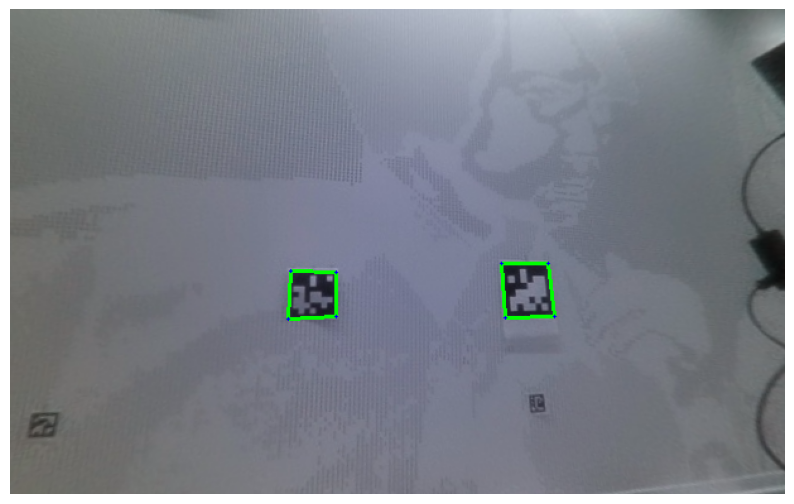

Image 2
Number of detected markers: 2


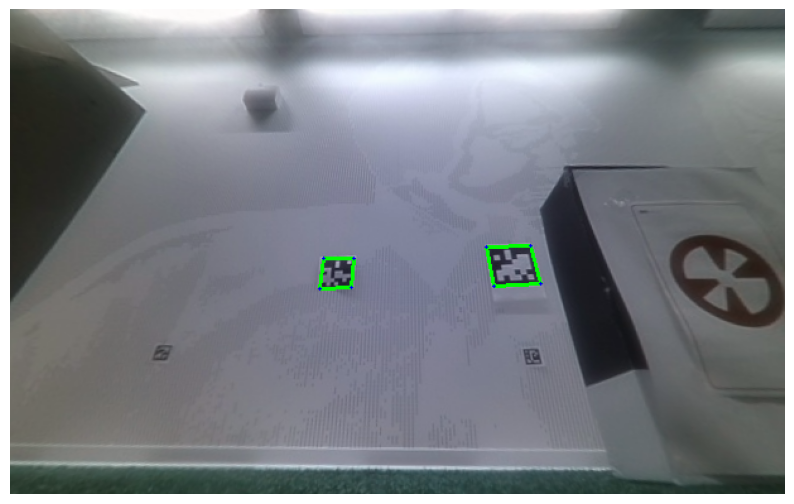

Image 3
Number of detected markers: 2


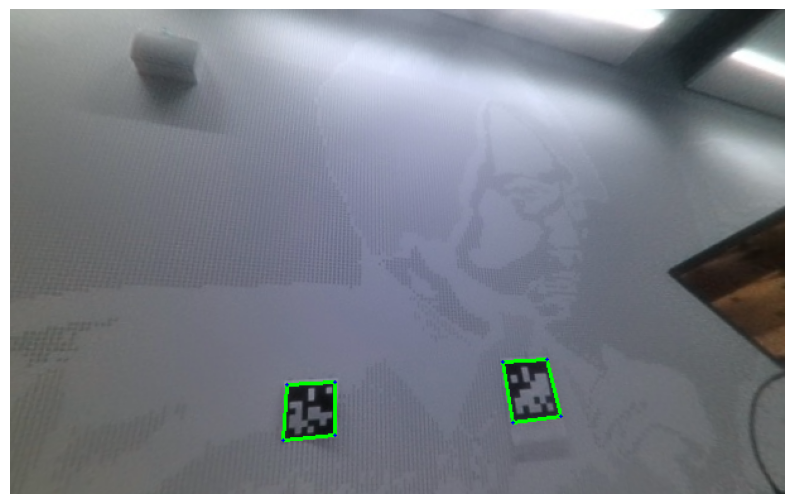

In [113]:
images = ["Archive/2024-11-12 16_49_57.png",
          "Archive/2024-11-12 16_50_23.png",
          "Archive/2024-11-12 16_49_55.png"
          ]

for i, img in enumerate(images):
    print("Image",i+1)
    image = cv2.imread(img)
    info = detect_and_plot(image)

In [114]:
print(info)

[[(array([[[257., 337.],
        [216., 341.],
        [219., 297.],
        [257., 295.]]], dtype=float32),), '37', '13'], [(array([[[436., 322.],
        [398., 327.],
        [390., 279.],
        [425., 277.]]], dtype=float32),), '8', '20']]


In [146]:
# Distance measurement
mtx = np.array([[2.819553679831719251e+02, 0.000000000000000000e+00, 3.262468506102194397e+02],
                [0.000000000000000000e+00, 2.810872370991155549e+02, 2.079618310698781727e+02],
                [0.000000000000000000e+00, 0.000000000000000000e+00, 1.000000000000000000e+00]])
dist = np.array([-2.907715721478895121e-01, 9.026962260361984236e-02, -1.148611991451896396e-03, 8.210446409115852728e-05, -1.226467727111531236e-02])
undist = np.array([0,0,0,0,0])
dist=undist

markerLengthdic = {"13": 0.1, "20":0.1, "37":0.1, "8":0.1} #marker lenght in meters depending on the type of marker


for i, img in enumerate(images):
    print("Image",i+1)
    image = cv2.imread(img)
    info = detect_and_plot(image, False)
    for idx, [markerCorner, rvecs, tvecs] in enumerate(info):
        if len(markerCorner) > 0:
            markerLength = markerLengthdic[d]
            rvecs, tvecs, _ = cv2.aruco.estimatePoseSingleMarkers(markerCorner, markerLength, mtx, dist)
            print(rvecs)
            print(tvecs)
            distance = np.linalg.norm(tvecs)
            print(f"Distance to the marker {idx}: {distance} meters")
    print("")
    

Image 1
Number of detected markers: 2
[[[-0.02977073  2.57258596 -0.02202712]]]
[[[-0.23504532  0.04863239  0.76969435]]]
Distance to the marker 0: 0.8062510821142841 meters
[[[ 0.02952378  2.86673181 -0.25833791]]]
[[[0.19509846 0.03278508 0.65797001]]]
Distance to the marker 1: 0.687068265048719 meters

Image 2
Number of detected markers: 2
[[[ 0.00554216  3.17678224 -0.58697841]]]
[[[-0.26836936  0.00240265  1.12059461]]]
Distance to the marker 0: 1.1522847632021296 meters
[[[ 0.08225068  2.98974612 -0.84604024]]]
[[[ 0.19682307 -0.01577993  0.77412163]]]
Distance to the marker 1: 0.7989071469877521 meters

Image 3
Number of detected markers: 2
[[[-0.05228358  2.46736007 -0.48513197]]]
[[[-0.22001407  0.27267198  0.70352661]]]
Distance to the marker 0: 0.7859426768963578 meters
[[[ 0.04191648  2.71230635 -0.55194665]]]
[[[0.19395578 0.20845239 0.63304849]]]
Distance to the marker 1: 0.6941337303025634 meters



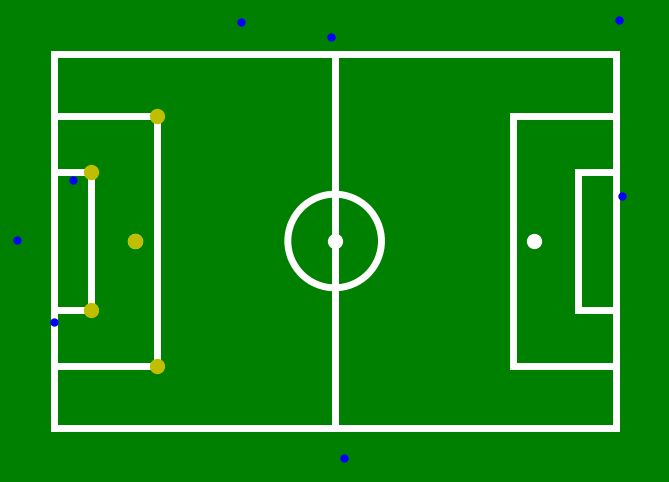

In [149]:
import matplotlib.pyplot as plt
from matplotlib import patches

# Unique marker keys with (z, x, y) coordinates
markers = {
    "Marker set `7x7_50_1`":  (-0.67, 5.01, 1.06),
    "Marker set `7x7_50_2`":  (3.42, 6.09, 0.61),
    "Marker set `7x7_50_3`":  (5.62, 0.62, 0.89),
    "Marker set `36H11_1`": (1.18, 5.84, 0.68),
    "Marker set `36H11_2`": (-0.67, 6.01, 1.48),
    "Marker set `36H11_3`": (-0.06, -3.26, 1.19),
    "Marker set `36H11_4`": (-4.19, -0.97, 0.46),
    "Marker set `36H11_5`": (-4.5, 1.3, 0.39),
    "Marker set `36H11_6`": (4.56, -3.54, -0.07),
    "Marker set `36H11_7`": (4.61, -0.72, 0.67),
    "Marker set `36H12_1`": (-2.14, 5.44, 0.46),
    "Marker set `36H12_2`": (0.15, 3.47, 0.1),
    "Marker set `36H12_3`": (2.88, -4.42, 0.99),
    "Marker set `36H12_4`": (0.76, -3.91, 0.39),
    "Marker set `36H12_5`": (-1.5, -3.5, 0.57),
    "Marker set `36H12_6`": (-1.64, -4.61, 0.55),
    "Marker set `36H12_7`": (-5.08, -0.02, 1.38)
}

# Dimensions in mm
A = 9000  # Field length
B = 6000  # Field width
C = 50    # Line width
D = 100   # Penalty mark size
E = 600   # Goal area length
F = 2200  # Goal area width
G = 1650  # Penalty area length
H = 4000  # Penalty area width
I = 1300  # Penalty mark distance
J = 1500  # Center circle diameter
K = 700   # Border strip width

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor("green")  # Set the background color to green

# Draw the outer field
outer_field = patches.Rectangle((0, 0), A, B, linewidth=C/10, edgecolor='white', facecolor='none')
ax.add_patch(outer_field)

# Goal areas
goal_area_left = patches.Rectangle((0, (B - F) / 2), E, F, linewidth=C/10, edgecolor='white', facecolor='none')
goal_area_right = patches.Rectangle((A - E, (B - F) / 2), E, F, linewidth=C/10, edgecolor='white', facecolor='none')
ax.add_patch(goal_area_left)
ax.add_patch(goal_area_right)

# Penalty areas
penalty_area_left = patches.Rectangle((0, (B - H) / 2), G, H, linewidth=C/10, edgecolor='white', facecolor='none')
penalty_area_right = patches.Rectangle((A - G, (B - H) / 2), G, H, linewidth=C/10, edgecolor='white', facecolor='none')
ax.add_patch(penalty_area_left)
ax.add_patch(penalty_area_right)

# Penalty marks
ax.plot(I, B / 2, 'wo', markersize=D/10)  # Left penalty mark
ax.plot(A - I, B / 2, 'wo', markersize=D/10)  # Right penalty mark

# Center circle
center_circle = patches.Circle((A / 2, B / 2), J / 2, linewidth=C/10, edgecolor='white', facecolor='none')
ax.add_patch(center_circle)
ax.plot(A / 2, B / 2, 'wo', markersize=D/10)  # Center mark

# Halfway line
ax.plot([A / 2, A / 2], [0, B], 'white', linewidth=C/10)



#Plot the ducks
ax.plot(G, int((B+H)/2), 'yo', markersize=10)
ax.plot(G, int((B-H)/2), 'yo', markersize=10)
ax.plot(E, int((B+F)/2), 'yo', markersize=10)
ax.plot(E, int((B-F)/2), 'yo', markersize=10)
ax.plot(I, B / 2, 'yo', markersize=10)  

# Plot the markers on the field
for marker, (x, y, z) in markers.items():
    # Convert (x, y) to pixel coordinates
    x *= 1000
    y*=1000
    x_img = int((x + A/2) )
    y_img = int((-y + B/2) )

    # Draw a blue circle for each marker
    ax.plot(x_img, y_img, 'bo', markersize=5)


# Show position


# Set the limits and aspecs
ax.set_xlim(-K, A + K)
ax.set_ylim(-K, B + K)
ax.set_aspect('equal', adjustable='box')
ax.axis('off')  # Turn off axe
plt.show()
